## **Cloning the image  data from Udacity simulator**

In [1]:
!git clone https://github.com/sparsh-18/Steering-angle-prediction

fatal: destination path 'Steering-angle-prediction' already exists and is not an empty directory.


In [2]:
!ls Steering-angle-prediction

'Behavioural Clonning'	 driving_log.csv   IMG	 README.md


**Import lib**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random

## **CSV Data**

In [4]:
datadir = 'Steering-angle-prediction'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

We do not need the path address in the columns hence we will use ntpath to remove it.

In [5]:
import ntpath

In [6]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

Example of how path is removed

In [7]:
p = data['center'][0]
print("Original path: ", p)
p = path_leaf(p)
print("\nUpdated path: ", p)

Original path:  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg

Updated path:  center_2018_07_16_17_11_43_382.jpg


**Path is updated in all rows of the columns**

In [8]:
data['center'] = data['center'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)

In [9]:
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

## **A histogram of the data**

To construct the histogram the entire range of values is divided into intervals called bins.

In [10]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In the simulator 0 means driving in the center of the road.
Here the values are not centered around 0.
Lets add values adjacent such as adding -0.92 to 1 and doubling it. By this the center value -0.04 will be added to 0.04 and end up in 0.

In [11]:
center = (bins[:-1] + bins[1:]) * 0.5
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

<BarContainer object of 25 artists>

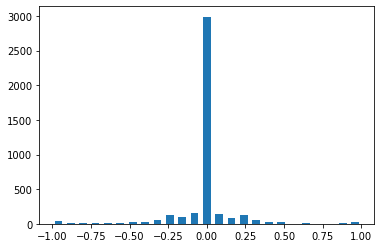

In [12]:
plt.bar(center, hist, width=0.05)

## **Balancing Data**

As we drove in the middle hence 0 is more. If we train this data the model may learn to bias 0 and driving straight. So we specify a threshold of 200 hence every bin can only have 200 values.

In [13]:
samples_per_bin = 400

What we will do is that we collect all the steering angles belonging to a specific bin in a list.
From this list only 200 values is to be taken hence we shuffle the list first so that the values from end of the path is not removed.

In [14]:
from sklearn.utils import shuffle

In [15]:
print('total data:', len(data))

# List containg 200 values of each bin
remove_list = []

# iteraring through the bins
for j in range(num_bins):

  # list containing a values of a bin
  list_ = []

  # iterating through the data
  for i in range(len(data['steering'])):
    
    # data of a specific bin
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)

  # shuffling list
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

total data: 4053
removed: 2590
remaining: 1463


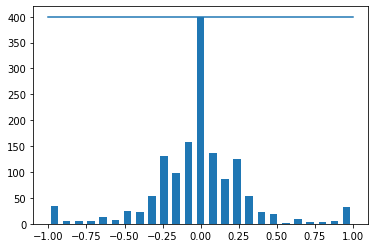

In [16]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [17]:
data.head()

center                              left  \
12  center_2018_07_16_17_11_44_413.jpg  left_2018_07_16_17_11_44_413.jpg   
13  center_2018_07_16_17_11_44_485.jpg  left_2018_07_16_17_11_44_485.jpg   
14  center_2018_07_16_17_11_44_558.jpg  left_2018_07_16_17_11_44_558.jpg   
15  center_2018_07_16_17_11_44_627.jpg  left_2018_07_16_17_11_44_627.jpg   
16  center_2018_07_16_17_11_44_697.jpg  left_2018_07_16_17_11_44_697.jpg   

                                right  steering  throttle  reverse     speed  
12  right_2018_07_16_17_11_44_413.jpg -0.050000  0.642727  0.0      1.434013  
13  right_2018_07_16_17_11_44_485.jpg -0.250000  0.863326  0.0      2.173052  
14  right_2018_07_16_17_11_44_558.jpg -0.400000  1.000000  0.0      2.864847  
15  right_2018_07_16_17_11_44_627.jpg -0.535431  1.000000  0.0      3.791584  
16  right_2018_07_16_17_11_44_697.jpg -0.431962  1.000000  0.0      4.489107

In [18]:
data.shape

(1463, 7)

In some data recovery laps are also created after testing the data.

When model dosen't know how to come back to the middle from side recovery log is recorded by adding more videos of car coming back to center.

Here we do not add recovery log now.

## **Split Data**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
data.iloc[0]

center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0.0                               
speed       1.434013                          
Name: 12, dtype: object



---

We will create 2 arrays one for image data (x) one for steering angle (y).
We will only use center image in this project.
The images are in the folder Self Driving\IMG\ so we need to append it before image name.

In [21]:
datadir = "Steering-angle-prediction/IMG/"

In [22]:
print(datadir)

Steering-angle-prediction/IMG/


In [23]:
image_paths = []
steering = []

for i in range(len(data)):
  row = data.iloc[i]
  center, steer = row[0], float(row[3])
  center = datadir + center

  image_paths.append(center)
  steering.append(steer)

image_paths = np.asarray(image_paths)
steering = np.asarray(steering)

In [24]:
image_paths

array(['Steering-angle-prediction/IMG/center_2018_07_16_17_11_44_413.jpg',
       'Steering-angle-prediction/IMG/center_2018_07_16_17_11_44_485.jpg',
       'Steering-angle-prediction/IMG/center_2018_07_16_17_11_44_558.jpg',
       ...,
       'Steering-angle-prediction/IMG/center_2018_07_16_17_16_30_981.jpg',
       'Steering-angle-prediction/IMG/center_2018_07_16_17_16_31_329.jpg',
       'Steering-angle-prediction/IMG/center_2018_07_16_17_16_31_617.jpg'],
      dtype='<U64')

In [25]:
from PIL import Image

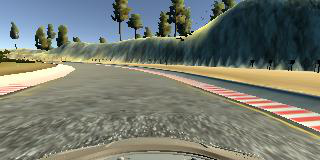

In [26]:
img = Image.open(image_paths[0])
img

In [27]:
print(steering)

[-0.05 -0.25 -0.4  ...  0.    0.    0.  ]


In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steering, test_size=0.2, random_state=5)

In [29]:
len(X_train)

1170

In [30]:
len(X_valid)

293

Text(0.5, 1.0, 'Validation')

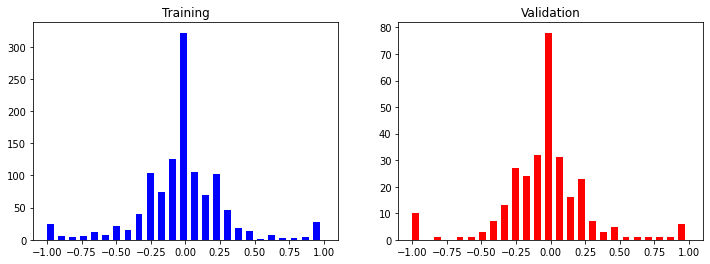

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
ax[0].set_title('Training')
ax[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
ax[1].set_title('Validation')

### **Augmentation**

In [32]:
from imgaug import augmenters as iaa
import matplotlib.image as mpimg

In [33]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

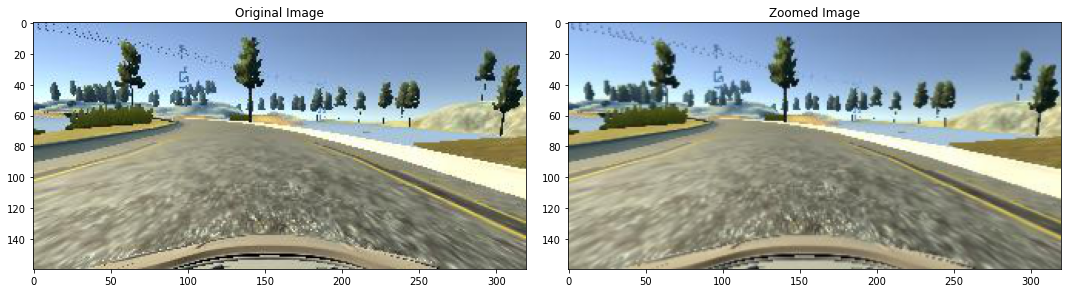

In [34]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [35]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

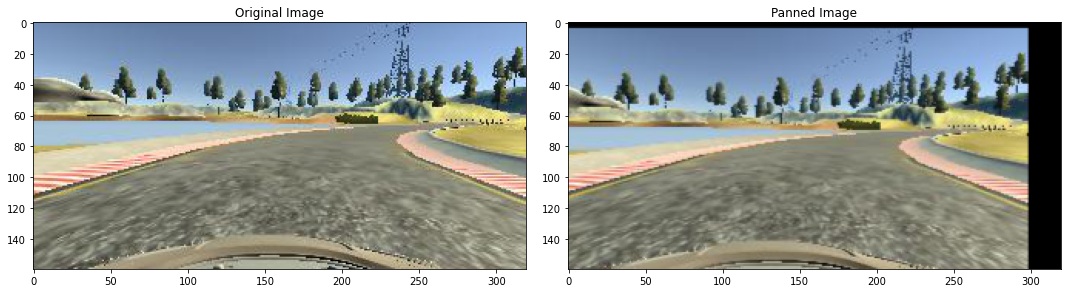

In [36]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [37]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

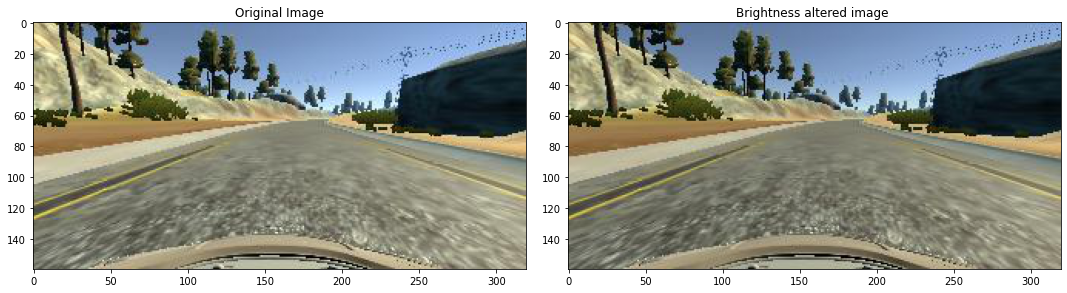

In [38]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [39]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.4710873')

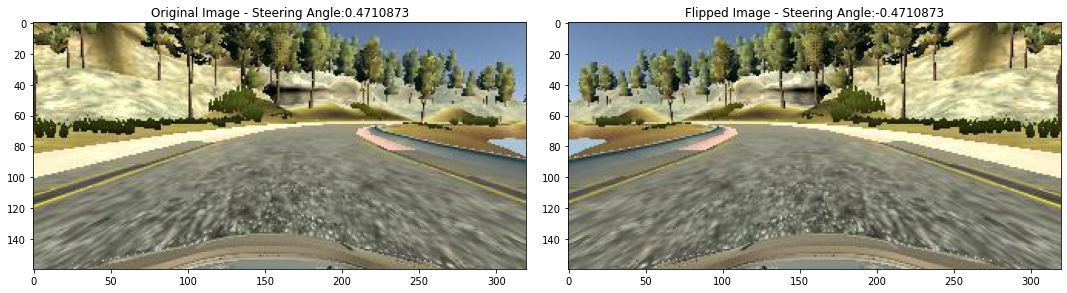

In [40]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steering[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

Randomly augment image and each augmentation should be less than 50% of the time

In [41]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

Randomly augmented

In [42]:
print(len(image_paths))

1463


In [43]:
print(steering)

[-0.05 -0.25 -0.4  ...  0.    0.    0.  ]


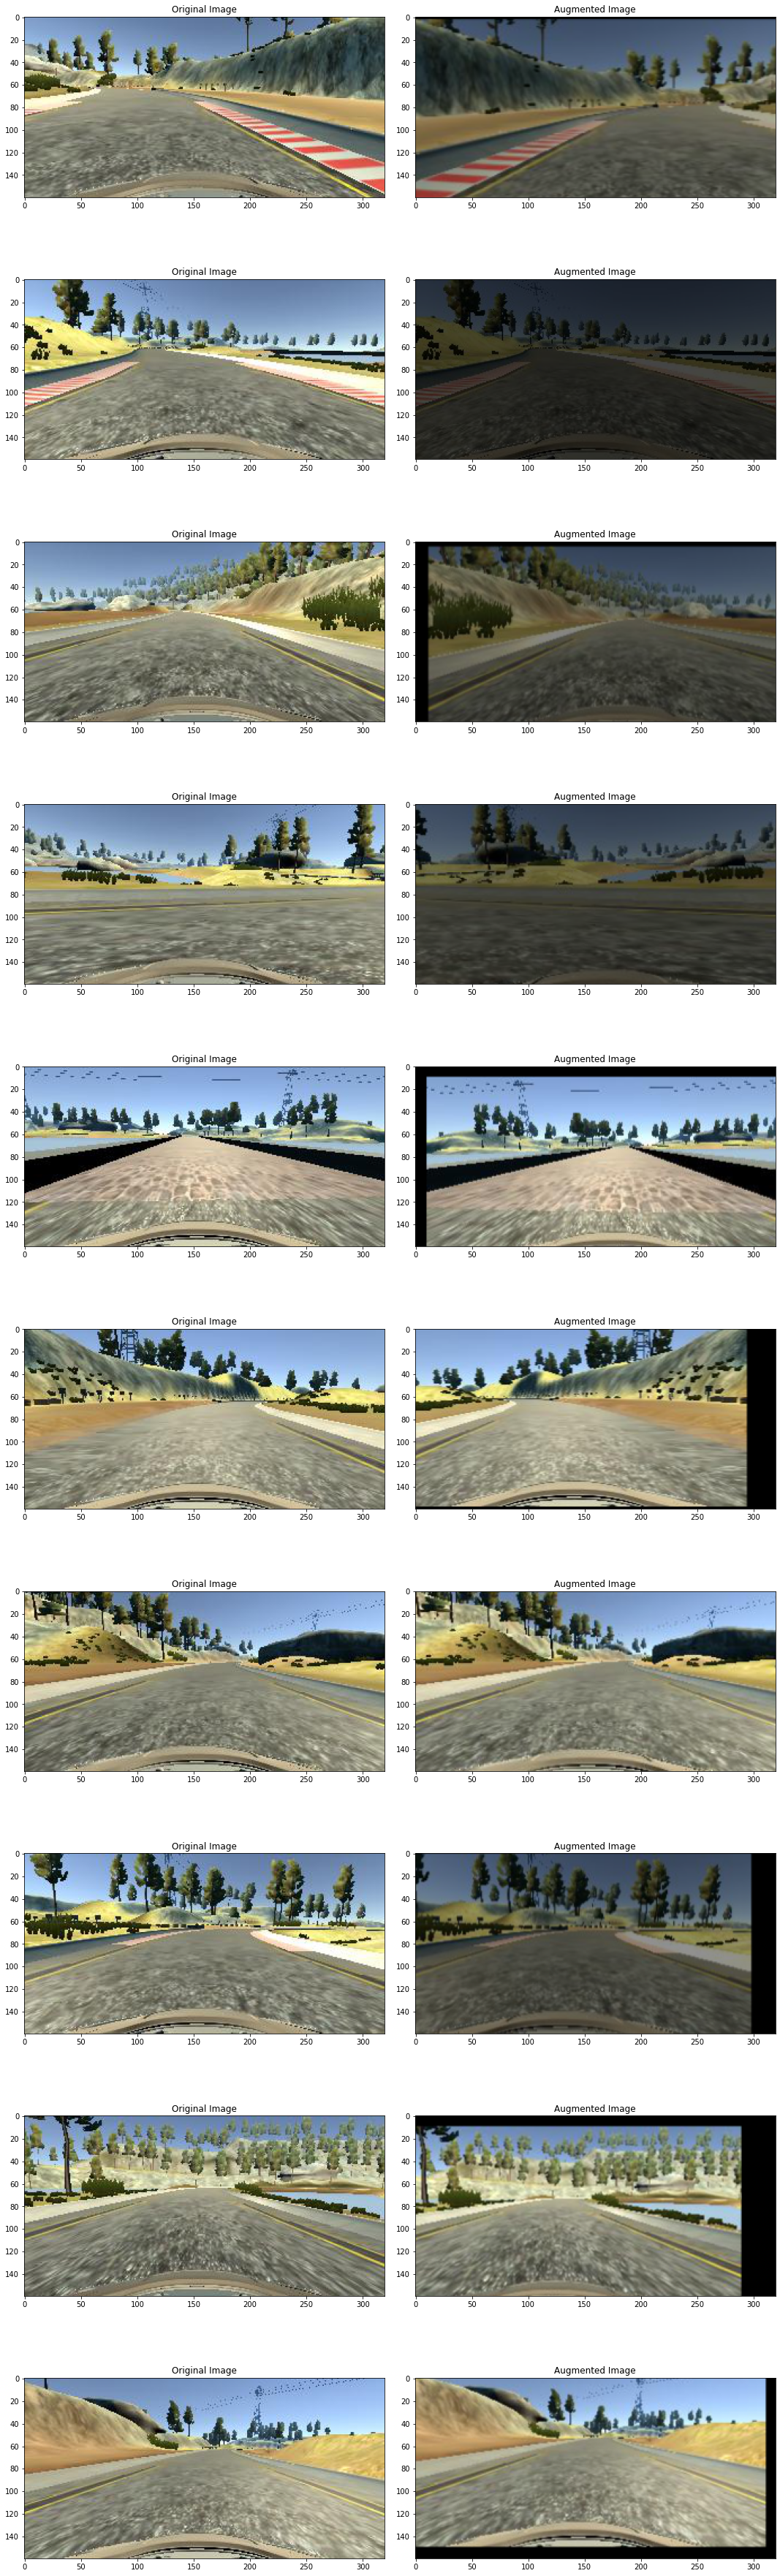

In [44]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steering[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, augmented_steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")


## **Preprocessing Images**

lets print 4 random images

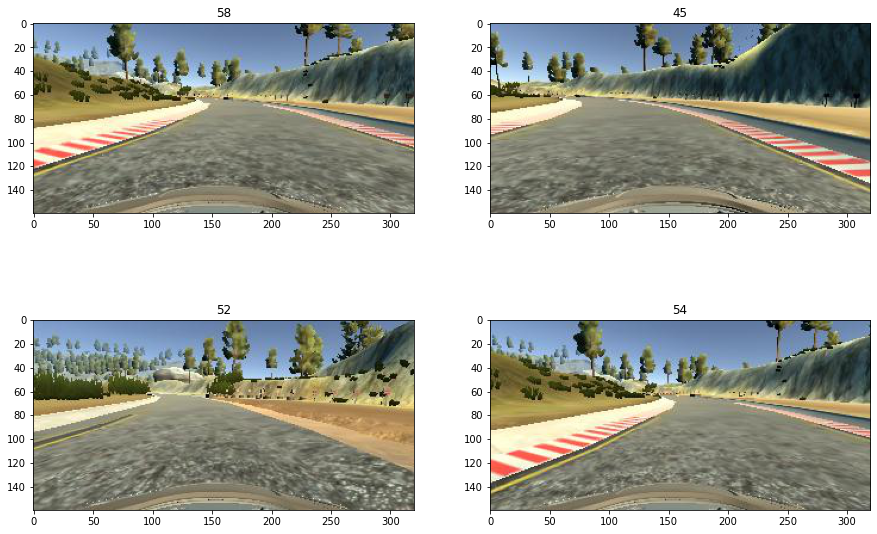

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i in range(2):
  for j in range(2):
    random_int = random.randint(0, 100)
    randimg = mpimg.imread(image_paths[random_int])
    ax[i][j].imshow(randimg)
    ax[i][j].set_title(random.randint(0, 100))

We can observe that the data b/w 0-60 is of no use. Its just scenary.

In [46]:
def preprocess(img):
  img = img[60:135,:,:] # cropping
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # YUV is suited for Nvidia model
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66)) # size suited for Nvidia model
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

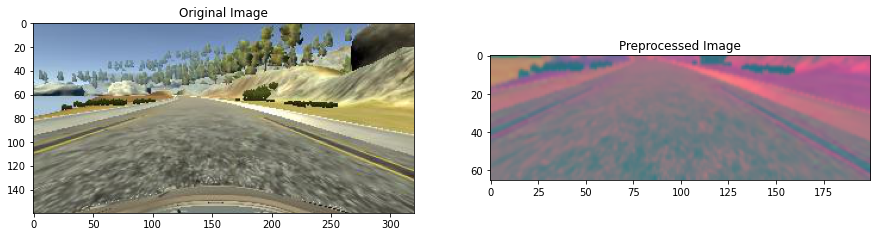

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
original_img = mpimg.imread(image_paths[100])

ax[0].imshow(original_img)
ax[0].set_title("Original Image")

preprocessed_img = preprocess(mpimg.imread(image_paths[100]))
ax[1].imshow(preprocessed_img)
ax[1].set_title("Preprocessed Image")

isTraining is used as the images used in training will be augments. The images used in validation should not be augmented.

This function uses yield keyword as it saves all initialized values of the function and the values should not be reinitialized at each call.

In [48]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths)-1)

      if istraining:
        im, st = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        st = steering_ang[random_index]
      
      im = preprocess(im)

      batch_img.append(im)
      batch_steering.append(st)
    
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

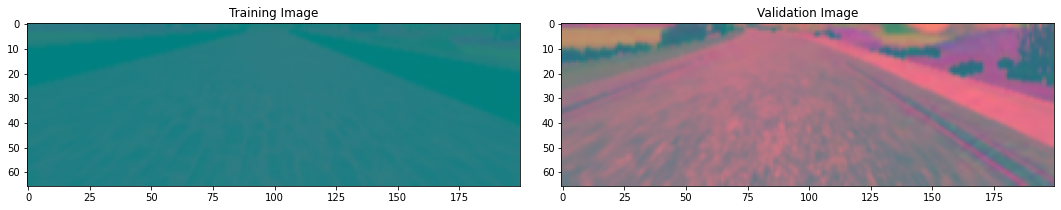

In [49]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

## **Preprocessing all images**

In [50]:
# X_train = np.array(list(map(preprocess, X_train)))
# X_valid = np.array(list(map(preprocess, X_valid)))

showing a random preprocessed image

In [51]:
# random_int = random.randint(0, len(X_train)-1)
# plt.imshow(X_train[random_int])
# plt.axis("off")
# plt.title(random_int)

## **Nvidia Model**

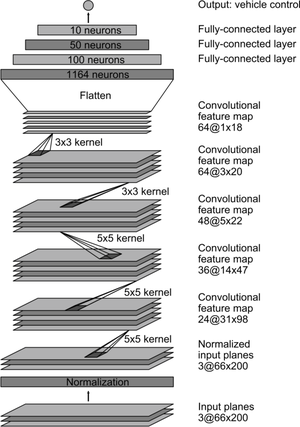

In [52]:
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve('https://developer.nvidia.com/blog/parallelforall/wp-content/uploads/2016/08/cnn-architecture-624x890.png',"nv.png")
  
img = Image.open("nv.png")
width, height = img.size[:2]

new_width  = 300
new_height = int(new_width * height / width)

img = img.resize((new_width, new_height), Image.ANTIALIAS)

img

In [53]:
from keras.layers import Conv2D

In [54]:
def nvidia_model():
  model = Sequential()

  model.add(Convolution2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100, activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(10, activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer = Adam(learning_rate = 1e-4)

  model.compile(loss='mse', optimizer=optimizer)

  return model

Strides (2, 2) means the processing is done 2 pixels horizontally and 2 vertically at a time.

In [55]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1



---



### **The data trained by Relu function.**

In [56]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)
# as we have less data hence increased the number of epochs to 30

In [57]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.legend(['training', 'validation'])
# plt.title('Loss')
# plt.xlabel('Epoch')

We can see that the training is not good. This happenes as in the **Relu** function a node returns  if value is -ve. So in gradient decent the node is unable to get trained and keeps on returning 0.
Hence we will use the **elu** activation function.



---



### **Trained using the Elu function**

In [58]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 137s 447ms/step - loss: 0.0795 - val_loss: 0.0563
Epoch 2/10
300/300 [==============================] - 132s 442ms/step - loss: 0.0619 - val_loss: 0.0506
Epoch 3/10
300/300 [==============================] - 131s 439ms/step - loss: 0.0576 - val_loss: 0.0469
Epoch 4/10
300/300 [==============================] - 128s 428ms/step - loss: 0.0522 - val_loss: 0.0418
Epoch 5/10
300/300 [==============================] - 129s 431ms/step - loss: 0.0477 - val_loss: 0.0412
Epoch 6/10
300/300 [==============================] - 130s 435ms/step - loss: 0.0442 - val_loss: 0.0367
Epoch 7/10
300/300 [==============================] - 128s 428ms/step - loss: 0.0406 - val_loss: 0.0327
Epoch 8/10
300/300 [==============================] - 127s 423ms/step - loss: 0.0383 - val_loss: 0.0325
Epoch 9/10
300/300 [==============================] - 128s 427ms/step - loss: 0.0377 - val_loss: 0.0286
Epoch 10/10
300/300 [==============================] - 128s 427m

Text(0.5, 0, 'Epoch')

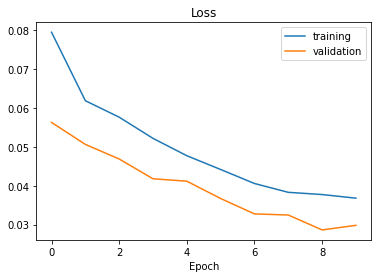

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [60]:
model.save('model.h5')

In [61]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>